In [1]:
import os
from PIL import Image

import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
root = 'D:\\KULIAH\\Semester 8\\Skripsi\\dataset\\data_dencis'

fnames = os.listdir(root)

In [3]:
len(fnames)

300

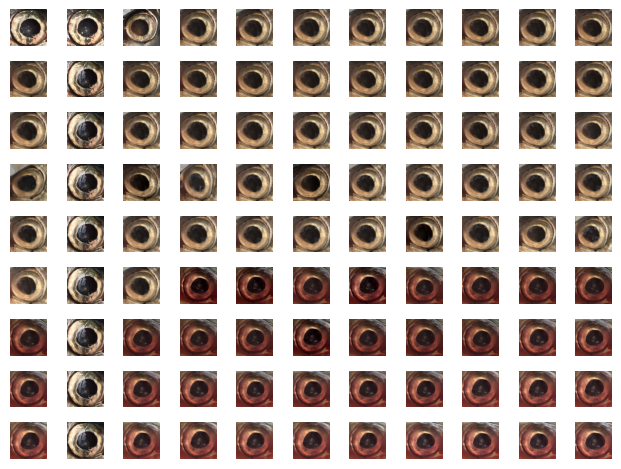

In [4]:
def resize_image(img, new_width, new_height):
    return img.resize((new_width, new_height))

fig , axs = plt.subplots(nrows=9,ncols=11)
axs = axs.flatten()
for i in range(99):
    filepath = os.path.join(root,fnames[i])
    img = Image.open(filepath)

    new_width = 256
    new_height = 256
    resized_img = resize_image(img, new_width, new_height)

    axs[i].imshow(resized_img)
    axs[i].axis('off') 
    
plt.tight_layout()
plt.show()

In [5]:
ds_path = "D:\\KULIAH\\Semester 8\\Skripsi\\dataset\\data_dencis"
img_folder = os.listdir(ds_path)

In [6]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image
import pillow_heif

def resize_image(img, new_width, new_height):
    return cv2.resize(img, (new_width, new_height))

def create_dataset_with_labels(img_folder):
    if not isinstance(img_folder, (str, bytes, os.PathLike)):
        raise TypeError("img_folder harus berupa string, bytes, atau os.PathLike")

    names = ['mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b',
             'mean_h','mean_s','mean_v','stddev_h','stddev_s','stddev_v', 'label']
    
    df = pd.DataFrame([], columns=names)
    target_list = []

    for file_num in range(1, 301):
        if file_num <= 100:
            target_list.append(1)  # Segar
        elif file_num <= 200:
            target_list.append(2)  # Tidak Segar
        else:
            target_list.append(3)  # Busuk

    for file_num in range(1, 301):
        img_extensions = ['.jpg', '.jpeg', '.png', '.heic']
        imgpath = None
        for ext in img_extensions:
            file = str(file_num) + ext  # Tambahkan ekstensi .jpg, .jpeg, .png, dan .heic
            imgpath = os.path.join(img_folder, file)
            
            if os.path.isfile(imgpath):
                break  # Jika gambar ditemukan, keluar dari loop

        if not os.path.isfile(imgpath):
            print("File not found:", imgpath)
            continue

        # Cek apakah gambar HEIC atau format lain
        if imgpath.lower().endswith('.heic'):
            try:
                pil_image = Image.open(imgpath)
                main_img = np.array(pil_image)
                main_img = cv2.cvtColor(main_img, cv2.COLOR_RGB2BGR)
            except Exception as e:
                print(f"Unable to read HEIC image {imgpath}: {e}")
                continue
        else:
            main_img = cv2.imread(imgpath)
            if main_img is None:
                print("Unable to read image:", imgpath)
                continue

        # Ubah ukuran gambar ke 256x256 piksel
        new_width = 256
        new_height = 256
        resized_img = resize_image(main_img, new_width, new_height)
        
        # Pra-pemrosesan
        img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        
        # Fitur warna dalam RGB
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0

        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)

        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)

        # Konversi ke HSV
        hsv_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2HSV)
        
        hue_channel = hsv_img[:,:,0]
        saturation_channel = hsv_img[:,:,1]
        value_channel = hsv_img[:,:,2]

        hue_mean = np.mean(hue_channel)
        saturation_mean = np.mean(saturation_channel)
        value_mean = np.mean(value_channel)

        hue_std = np.std(hue_channel)
        saturation_std = np.std(saturation_channel)
        value_std = np.std(value_channel)

        # Buat vektor dari kombinasi fitur
        vector = [red_mean, green_mean, blue_mean, red_std, green_std, blue_std,
                  hue_mean, saturation_mean, value_mean, hue_std, saturation_std, value_std]
        
        # Tambahkan vektor ke dalam DataFrame bersama dengan labelnya
        df_temp = pd.DataFrame([vector + [target_list[file_num-1]]], columns=names)
        df = pd.concat([df, df_temp], ignore_index=True)

    return df

# Definisikan path ke folder yang berisi gambar
img_folder = "D:\\KULIAH\\Semester 8\\Skripsi\\dataset\\data_dencis"

# Buat dataset dengan label
dataset = create_dataset_with_labels(img_folder)

C:\Users\acer\AppData\Local\Temp\ipykernel_17832\2793164447.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)


In [7]:
dataset.shape

(300, 13)

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.to_csv("Dencis.csv")